# Visualisation of the data

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

### Data

In [157]:
df_pays = pd.read_csv('ressources/Country-data.csv')

In [158]:
df_pays

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### Description of the columns:

In [159]:
columns = pd.read_csv('ressources/data-dictionary.csv')
columns

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


### Calcul des statistiques du dataframe df_pays

In [160]:
# Moyenne et variance par catégorie d’information (feature)
df_statistiques = df_pays.describe()

In [161]:
# Calculer la variance des colonnes sélectionnées
variance_selected_columns = df_pays[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']].var()
df_statistiques.loc['variance'] = variance_selected_columns
df_statistiques

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,1.670000e+02,167.000000,167.000000,167.000000,1.670000e+02
mean,38.270060,41.108976,6.815689,46.890215,1.714469e+04,7.781832,70.555689,2.947964,1.296416e+04
std,40.328931,27.412010,2.746837,24.209589,1.927807e+04,10.570704,8.893172,1.513848,1.832870e+04
min,2.600000,0.109000,1.810000,0.065900,6.090000e+02,-4.210000,32.100000,1.150000,2.310000e+02
25%,8.250000,23.800000,4.920000,30.200000,3.355000e+03,1.810000,65.300000,1.795000,1.330000e+03
50%,19.300000,35.000000,6.320000,43.300000,9.960000e+03,5.390000,73.100000,2.410000,4.660000e+03
75%,62.100000,51.350000,8.600000,58.750000,2.280000e+04,10.750000,76.800000,3.880000,1.405000e+04
max,208.000000,200.000000,17.900000,174.000000,1.250000e+05,104.000000,82.800000,7.490000,1.050000e+05
variance,1626.422713,751.418298,7.545116,586.104198,3.716439e+08,111.739781,79.088507,2.291734,3.359414e+08


### Matrice de corrélation


In [162]:
corr_matrix = df_pays[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']].corr()

In [163]:
corr_matrix

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


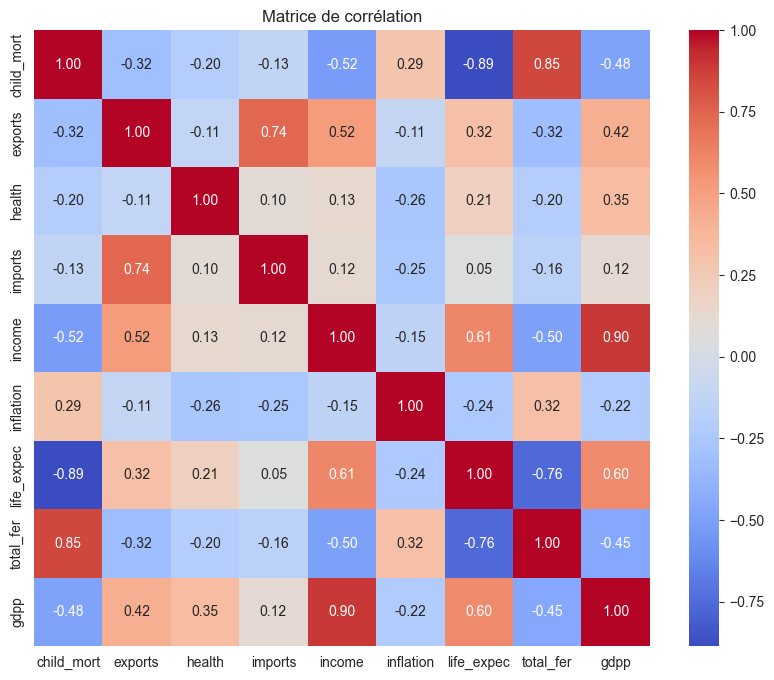

In [164]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title('Matrice de corrélation')
plt.show()

Plus la valeur absolue de la corrélation est proche de 1, plus les variables sont corrélées.
Mais cette corrélation est positive si les variables augmentent ensemble et négative si elles évoluent en sens inverse.

Nous remarquons que les données sont corrélées de manière logique, par exemple :
- le revenu est corrélé positivement avec le PIB
- le taux de mortalité infantile est corrélé négativement avec l'espérance de vie
- le taux de fécondité est corrélé négativement avec l'espérance de vie
- le taux de exportations est corrélé positivement avec le PIB

### Visualisation de la distribution des valeurs pour chaque variable selon tous les pays

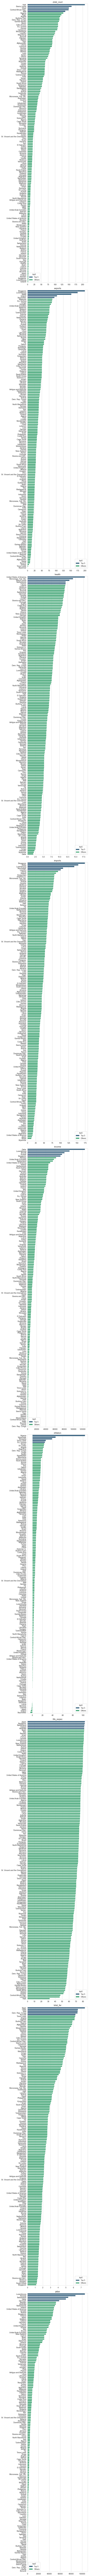

In [165]:
import numpy as np

columns_to_plot = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(7, 200))

# Parcourir chaque colonne et tracer le graphique correspondant
for column in columns_to_plot:
    plt.subplot(len(columns_to_plot), 1, columns_to_plot.index(column) + 1)
    
    # Sort the data for the current column and mark the top 5 values
    df_pays_sorted = df_pays[['country', column]].sort_values(by=column, ascending=False)
    df_pays_sorted['top5'] = np.where(df_pays_sorted[column].rank(ascending=False) <= 5, 'Top 5', 'Others')
    
    # Plot the data with different colors for the top 5 values
    sns.barplot(data=df_pays_sorted, x=column, y='country', hue='top5', dodge=False, palette='viridis')
    
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### Distribution en prenant en compte tous les pays en même temps

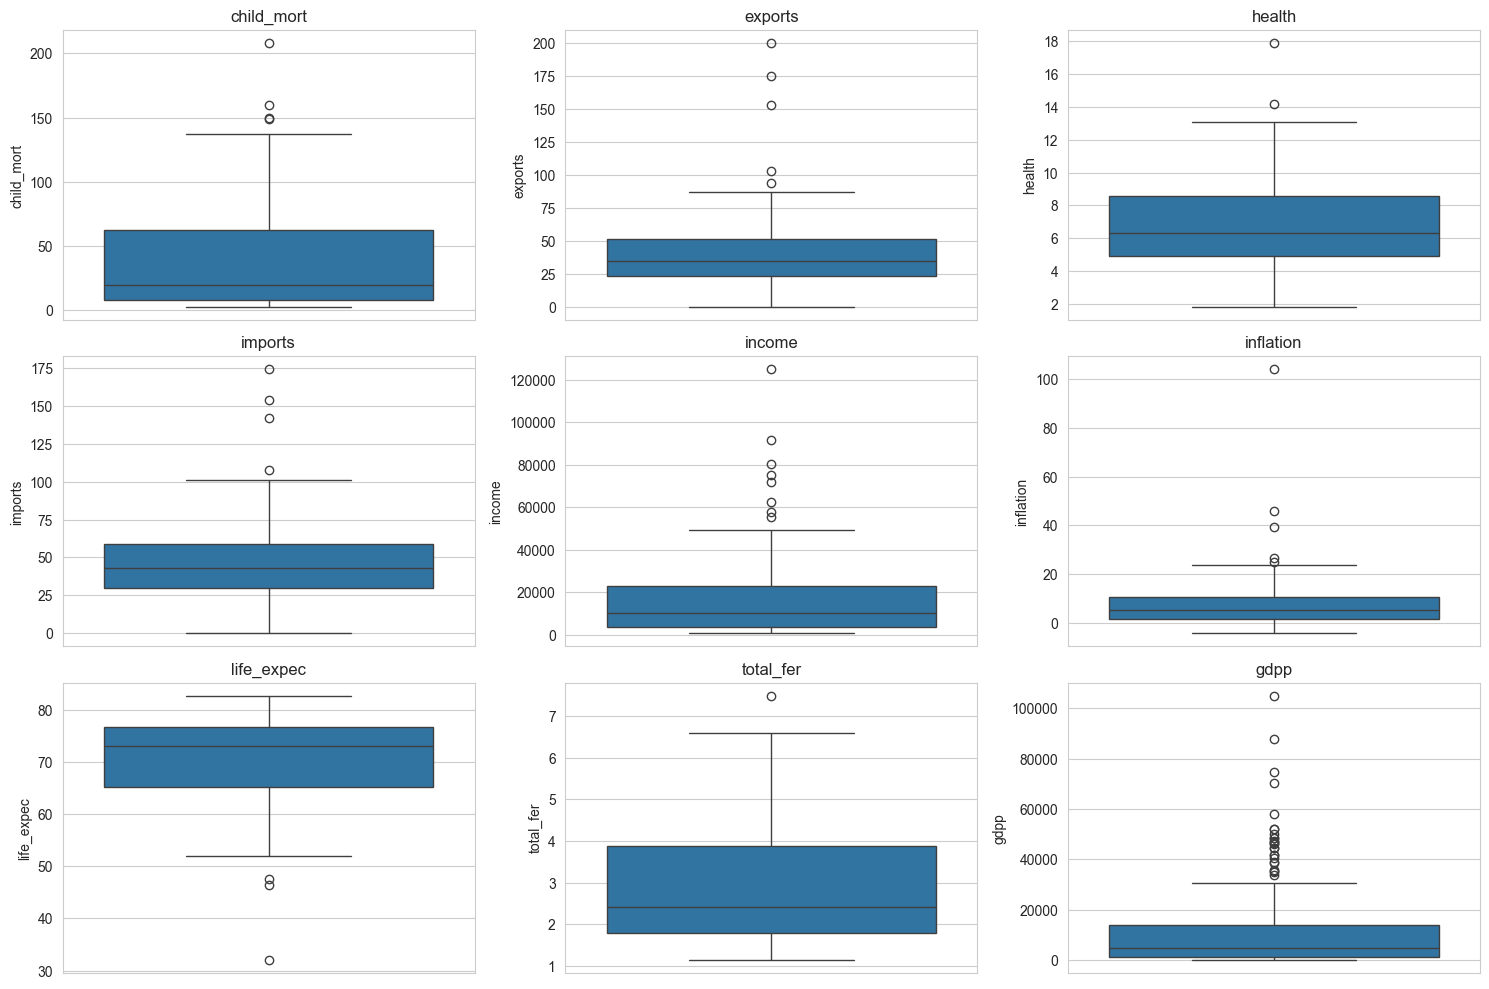

In [166]:
plt.figure(figsize=(15, 10))

# Parcourir chaque colonne et tracer le boxplot correspondant
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_pays[column])
    plt.title(column)

plt.tight_layout()
plt.show()

**Quelques précisions :**

- La valeur centrale du graphique (rectangle bleu) est la médiane : il existe autant de valeur supérieures qu'inférieures à cette valeur dans l'échantillon
- Les bords (haut et bas) du rectangle sont les quartiles. Pour le bord inférieur, un quart des observations ont des valeurs plus petites et trois quart ont des valeurs plus grandes, le bord supérieur suit le même raisonnement.
- Les extrémités sont calculées en utilisant 1.5 fois l'espace interquartile (la distance entre le 1er et le 3ème quartile).
- Les points en dehors des extrémités sont des valeurs aberrantes, qui sortent du lot.


Avec ces visualisations on peut essayer de ressortir quelques exemples de pays dans chaque classe.

Pas besoin d’aide: 
Peut avoir besoin d’aide:
À besoin d’aide:

### Classement des pays selon leurs caractéristiques

In [167]:
def x_lower_higher(x=15, mode="HIGHER", data=None, carac="health"):
    if mode.upper() == "HIGHER":
        return data.sort_values(by=carac, ascending=False)[:x]
    elif mode.upper() == "LOWER":
        return data.sort_values(by=carac, ascending=True)[:x]
    else:
        print("No match for mode.")
        return None
        
def plot_hist_lower_higher(x=15, mode="HIGHER", data=None, carac="health"):
    df = x_lower_higher(x=x, mode=mode, data=data, carac=carac)
    sns.barplot(x=df['country'], y=df[carac])
    plt.xticks(rotation=90)
    plt.show()

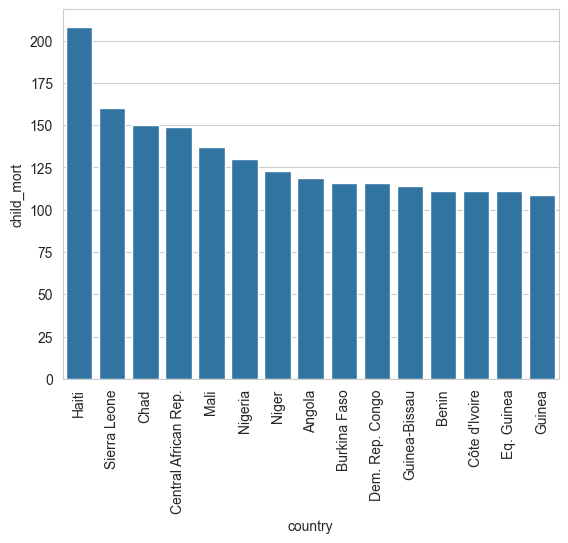

In [168]:
plot_hist_lower_higher(x=15, mode="HIGHER", data=df_pays, carac="child_mort")

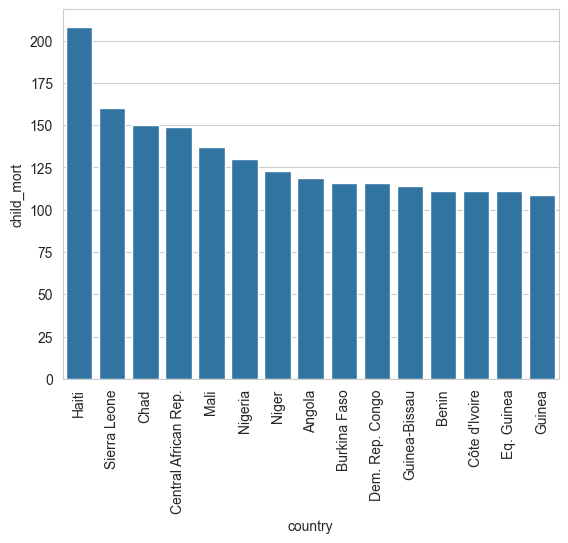

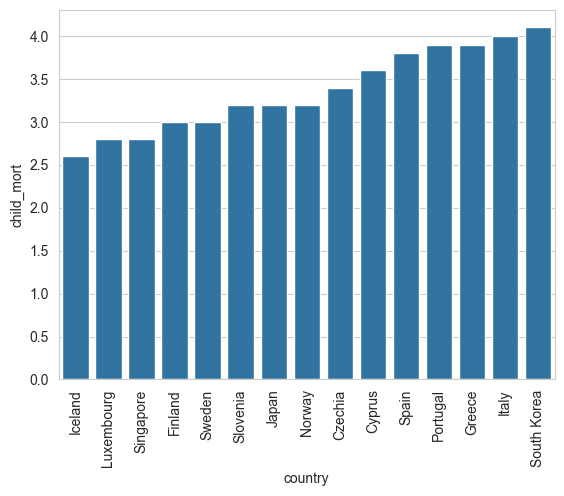

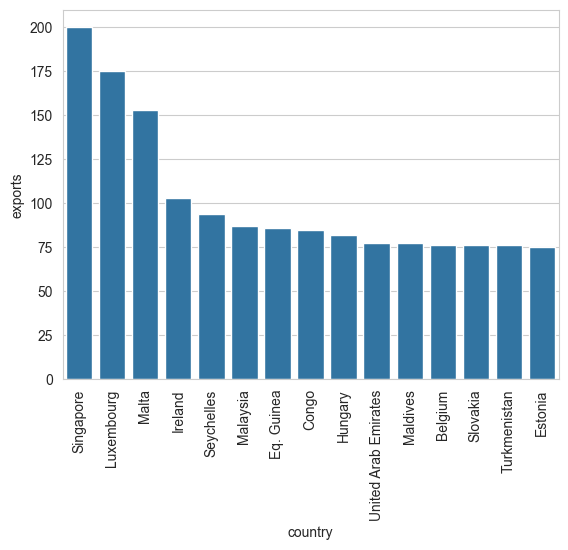

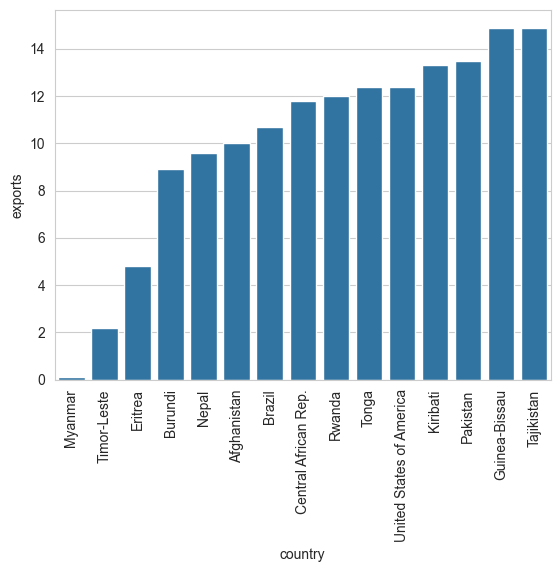

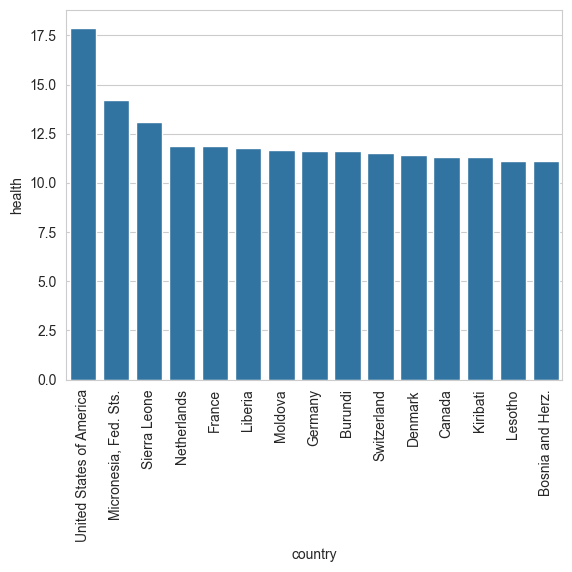

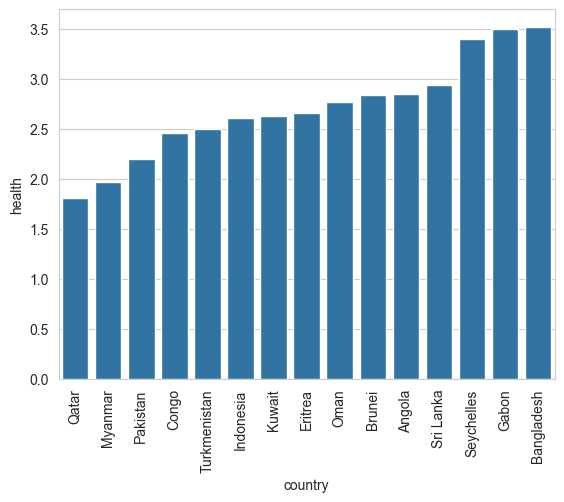

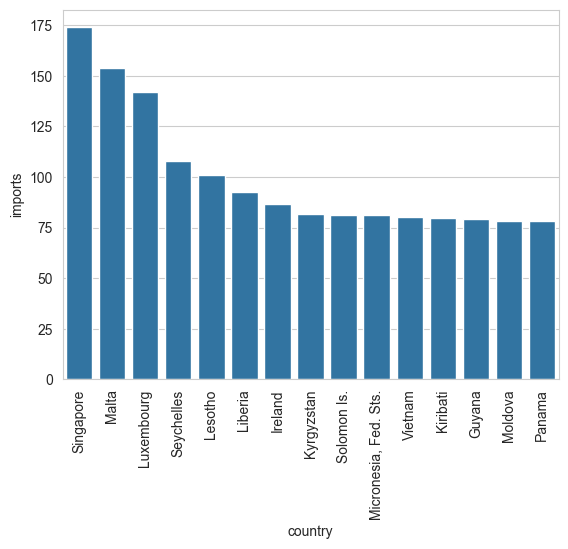

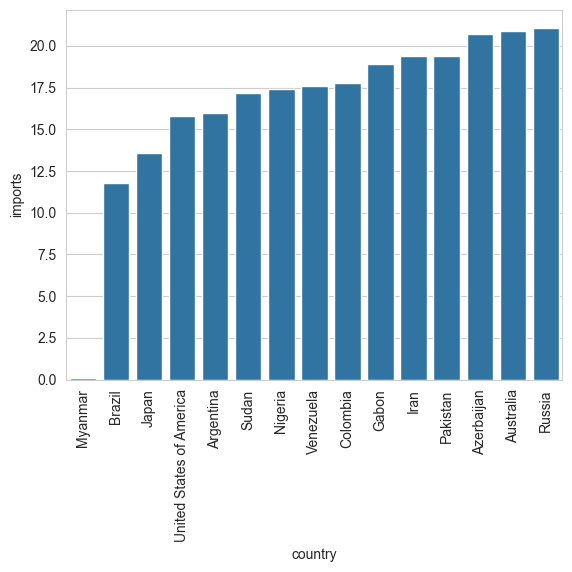

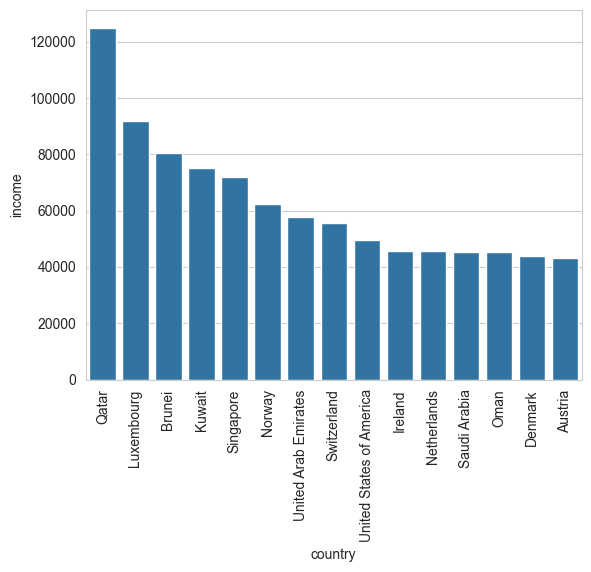

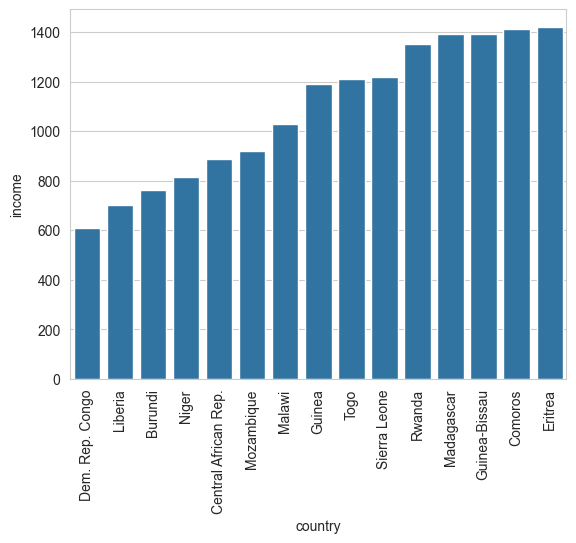

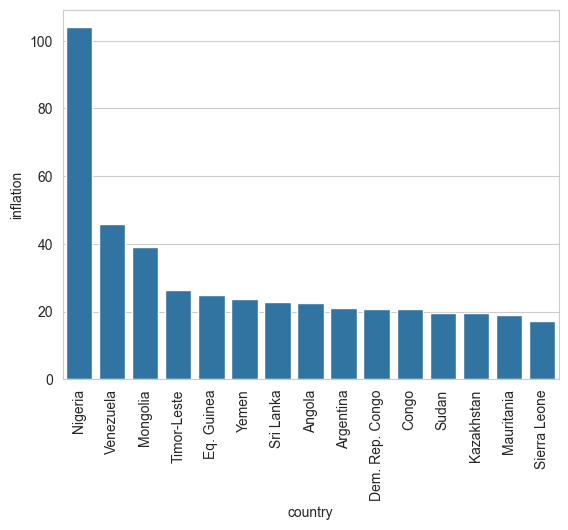

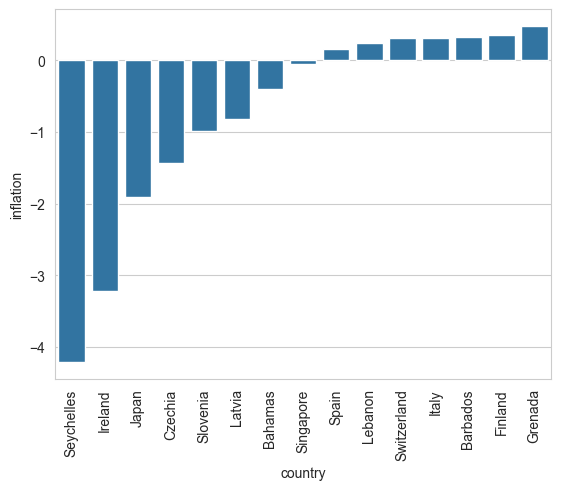

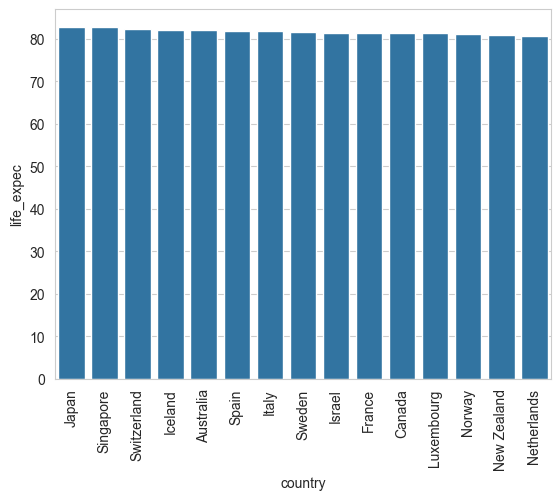

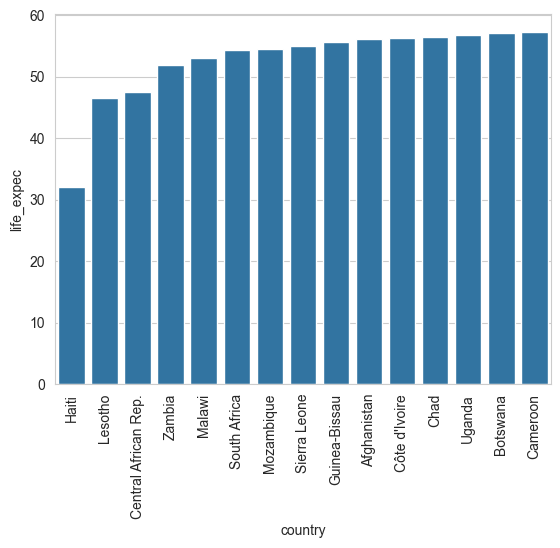

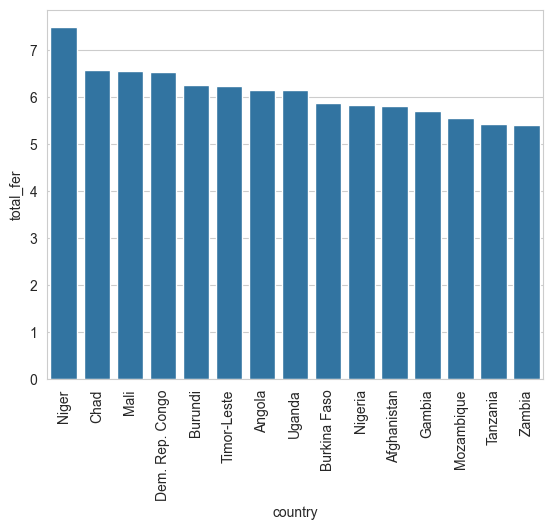

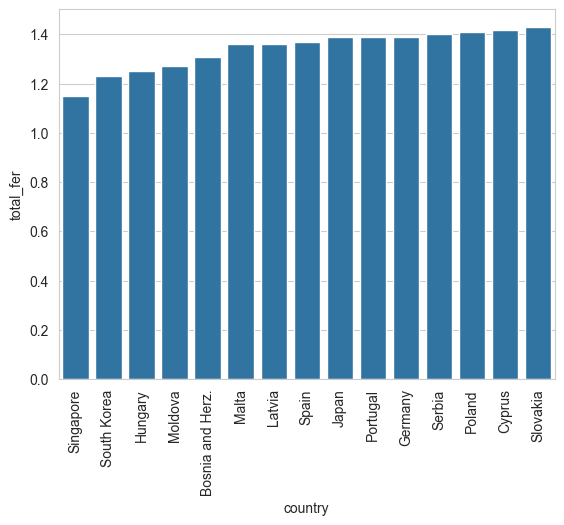

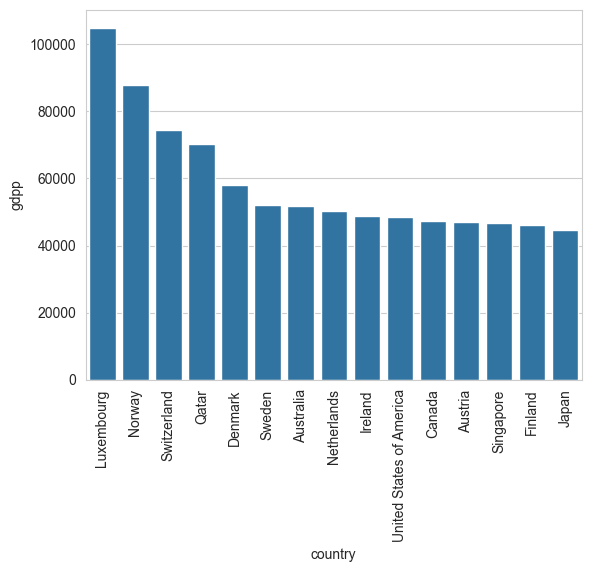

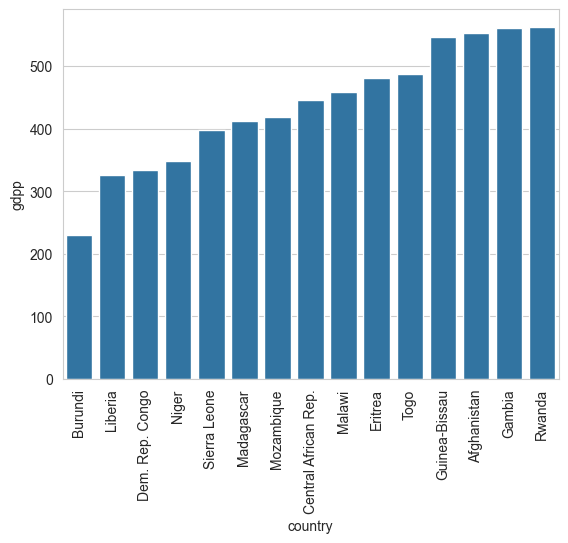

In [169]:
for column_name in df_pays.columns[1:]:
    plot_hist_lower_higher(x=15, mode="HIGHER", data=df_pays, carac=column_name)
    plot_hist_lower_higher(x=15, mode="LOWER", data=df_pays, carac=column_name)

Tout d'abord, les données qui ont une très forte corrélation (chiffre dont la valeur absolu est supérieur à 0.80) sont :
- child_mort et life_expec : -0.89
- child_mort et total_fer : 0.85
- income et gdpp : 0.89

--> On choisit donc de garder child_mort et d'enlever life_expect et total_fer, et de garder income et d'enlever gdpp.

On préfère garder income car nous trouvons que ce chiffre est plus représentatif que le gdpp. Le gdpp peut ne pas être représentatif car si des personnes sont très riches et d'autres très pauvres, le gdpp sera élevé mais ne reflètera pas la réalité de la population.

Pour résumer nous gardons pour l'instant les colonnes suivantes :
- child_mort
- income
- inflation
- exports
- health
- imports  

In [170]:
# df_pays = df_pays.drop(columns=['life_expec', 'gdpp', 'total_fer'])

### Avec ces visualisations on peut essayer de ressortir quelques exemples de pays dans chaque classe.

Pas besoin d'aide : Japon, France, Etats-Unis

Peut avoir besoin d'aide : Russia, China

À besoin d'aide : Nigeria, Burundi

# Choix d’un algorithme et pipeline

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler

In [172]:
features = df_pays.drop(columns=['country'])

weights = {
    'income': 1,
}

# Apply weights to features
weighted_features = features.copy()
for attribute, weight in weights.items():
    weighted_features[attribute] *= weight

preprocessor = StandardScaler()
# preprocessor = MinMaxScaler()
reductor = PCA(n_components=0.95)
kmeans = KMeans(n_clusters=3)

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('reductor', reductor),
    ('kmeans', kmeans)
])

pipeline.fit(features)

cluster_labels = pipeline.predict(weighted_features)
df_pays['cluster'] = cluster_labels
df_pays

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


In [173]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

reduced_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
reduced_df['cluster'] = cluster_labels

# Plot clusters using Plotly
fig = px.scatter(reduced_df, x='PC1', y='PC2', color='cluster', hover_name=df_pays['country'])
fig.show()

In [174]:
features = df_pays.drop(columns=['country'])

weights = {
    'income': 1,
}

# Apply weights to features
weighted_features = features.copy()
for attribute, weight in weights.items():
    weighted_features[attribute] *= weight

# preprocessor = StandardScaler()
preprocessor = MinMaxScaler()
reductor = PCA(n_components=0.95)
kmeans = KMeans(n_clusters=3)

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('reductor', reductor),
    ('kmeans', kmeans)
])

pipeline.fit(features)

cluster_labels = pipeline.predict(weighted_features)
df_pays['cluster'] = cluster_labels
df_pays

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [175]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

reduced_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
reduced_df['cluster'] = cluster_labels

# Plot clusters using Plotly
fig = px.scatter(reduced_df, x='PC1', y='PC2', color='cluster', hover_name=df_pays['country'])
fig.show()

In [176]:
features = df_pays.drop(columns=['country'])

weights = {
    'income': 1,
}

# Apply weights to features
weighted_features = features.copy()
for attribute, weight in weights.items():
    weighted_features[attribute] *= weight

# preprocessor = StandardScaler()
preprocessor = MinMaxScaler()
preprocessor2 = StandardScaler()
reductor = PCA(n_components=0.95)
kmeans = KMeans(n_clusters=3)

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('preprocessor2', preprocessor2),
    ('reductor', reductor),
    ('kmeans', kmeans)
])

pipeline.fit(features)

cluster_labels = pipeline.predict(weighted_features)
df_pays['cluster'] = cluster_labels
df_pays

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [177]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

reduced_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
reduced_df['cluster'] = cluster_labels

# Plot clusters using Plotly
fig = px.scatter(reduced_df, x='PC1', y='PC2', color='cluster', hover_name=df_pays['country'])
fig.show()

C:\Users\ronan\AppData\Local\Temp\ipykernel_8084\4128010257.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



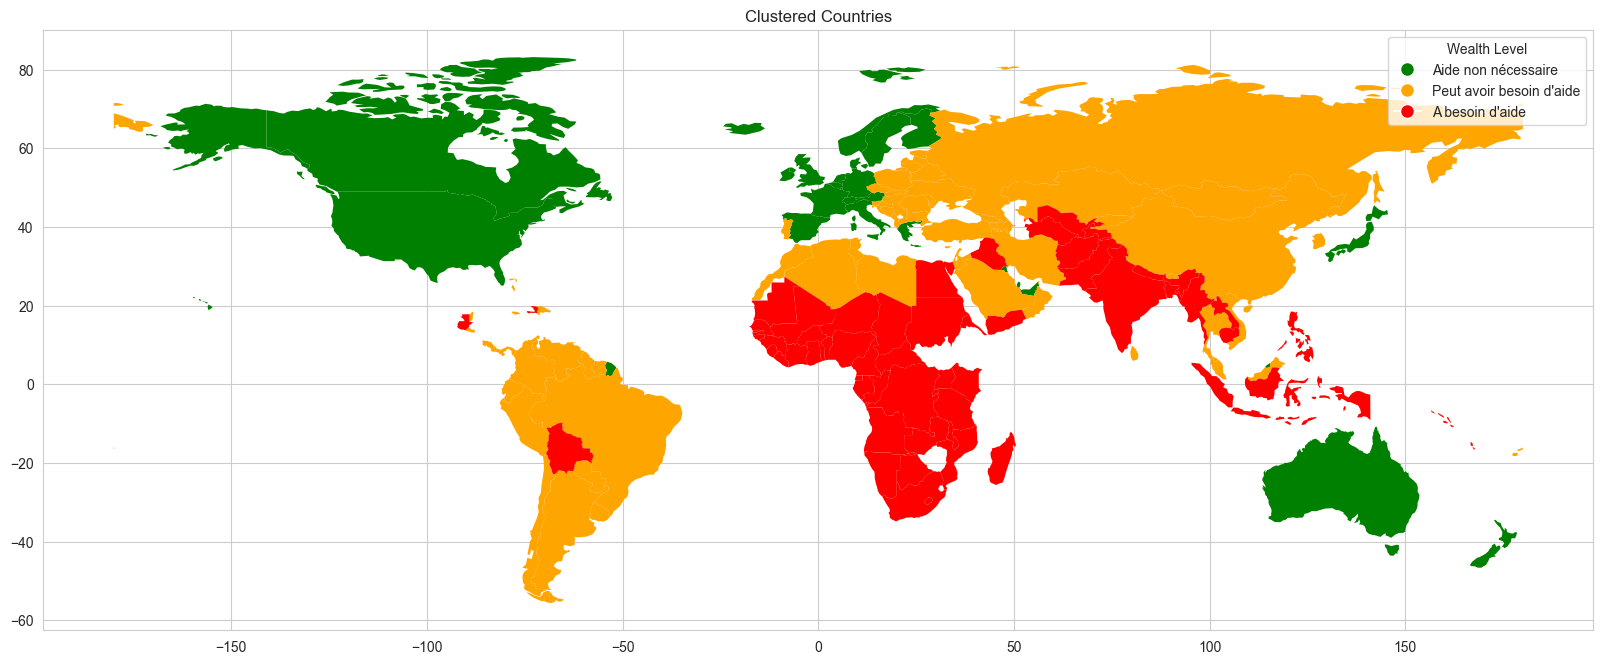

In [181]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world_clustered = world.merge(df_pays, left_on='name', right_on='country')

colors = {
    df_pays[df_pays['country'] == 'Norway']['cluster'].values[0]: 'green',
    df_pays[df_pays['country'] == 'Ukraine']['cluster'].values[0]: 'orange',
    df_pays[df_pays['country'] == 'Haiti']['cluster'].values[0]: 'red'
}

# Plot the map with specified colors for each cluster
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
for cluster_label, color in colors.items():
    world_clustered[world_clustered['cluster'] == cluster_label].plot(color=color, ax=ax, linewidth=0, edgecolor='0.8', label=f'Cluster {cluster_label}')

# Create legend handles and labels
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in {'Aide non nécessaire': 'green', "Peut avoir besoin d'aide": 'orange', "A besoin d'aide": 'red'}.items()]

# Add legend
plt.legend(handles=legend_handles, title='Wealth Level')

# Add title
plt.title('Clustered Countries')

plt.show()

In [179]:
# used to detect error in country names
for country in df_pays['country'].values:
    if country not in world['name'].values:
        print(f"not in {country}")

not in Antigua and Barbuda
not in Bahrain
not in Barbados
not in Cape Verde
not in Comoros
not in Grenada
not in Kiribati
not in Maldives
not in Malta
not in Mauritius
not in Micronesia, Fed. Sts.
not in Samoa
not in Seychelles
not in Singapore
not in St. Vincent and the Grenadines
not in Tonga
